[[2.03400268 1.89640947]
 [7.97410168 3.01678175]
 [2.96572891 5.93925202]]
9


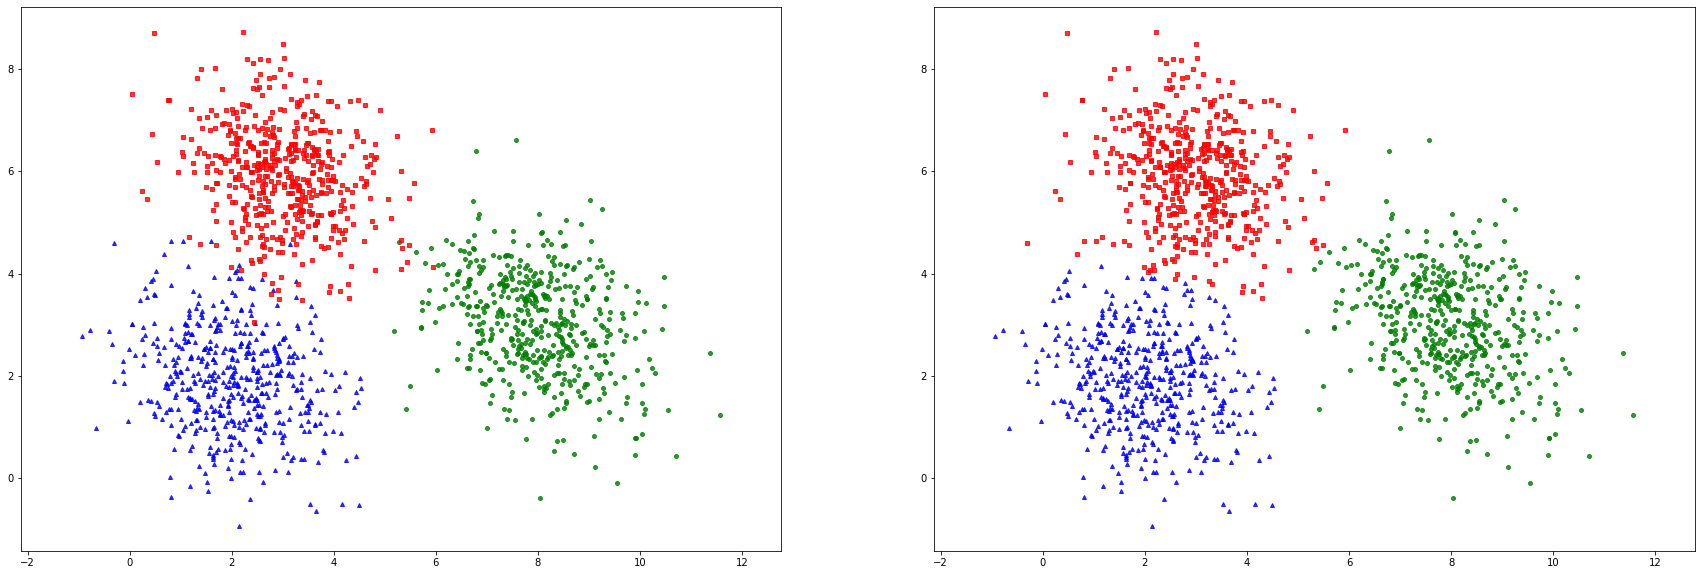

In [7]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from cluster.kmeans import KMeans

def display(X, label, ax):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    ax.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    ax.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    ax.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    ax.axis('equal')
    ax.plot()

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, -0.3], [-0.3, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
orig_labels = np.asarray([0]*N + [1]*N + [2]*N).T
K = 3

fig, axs = plt.subplots(1, 2, figsize=(30, 10))
axs[0].title.set_text('Declared labels')
display(X, orig_labels, axs[0])

kmeans = KMeans(X, K)
(centers, labels, iterations) = kmeans.cluster()
print(centers[-1])
print(iterations)
axs[0].title.set_text('kMeans labels')
display(X, labels[-1], axs[1])

plt.show()